<a href="https://colab.research.google.com/github/shiomasa1218/Colaboratory/blob/master/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# drive mean root directory of  google drive
!ls ./gdrive/'My Drive'/'Kumamoto-Univ'/'Graduationwork'/'exefolder'/'test_folder_name'

carpet1_2.0_afterlinear   sponge-y_2.0_afterlinear
carpet2_2.0_afterlinear   stonetile1_2.0_afterlinear
carpet3_2.0_afterlinear   whiteitile1_2.0_afterlinear
sponge-g_2.0_afterlinear  woodtile1_2.0_afterlinear


In [4]:
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# check auth
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.1MB/s 


In [5]:
cd gdrive/'My Drive'/'Kumamoto-Univ'/'Graduationwork'/'exefolder'/

/content/gdrive/My Drive/Kumamoto-Univ/Graduationwork/exefolder


load:tsponge-y_244.csv


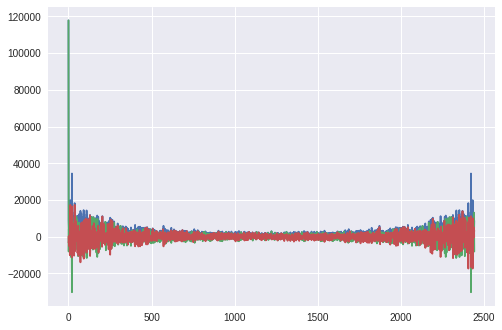

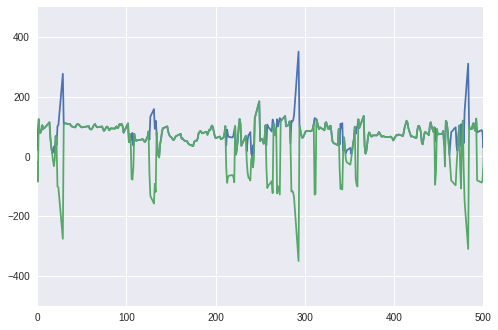

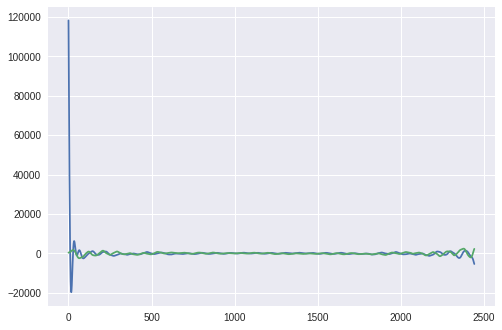

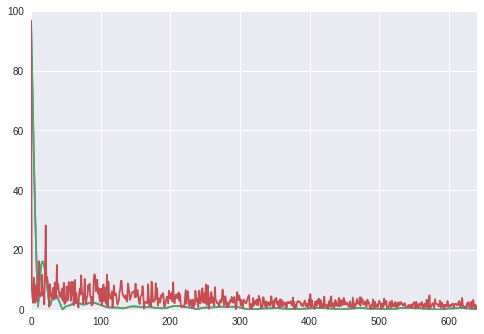

In [138]:
import numpy as np
import os
import scipy.fftpack
from pylab import *
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt 
from scipy.signal import butter, filtfilt 


#通常用FFT
def ffta(data):
    return np.fft.fft(data)

def butter_lowpass(cutoff, fs, order=5): 
    nyq = 0.5 * fs 
    normal_cutoff = cutoff/nyq 
    b, a = butter(order, normal_cutoff, btype='low', analog=False) 
    return b, a 

def butter_lowpass_filtfilt(data, cutoff, fs, order=5): 
    b, a = butter_lowpass(cutoff, fs, order=order) 
    y = filtfilt(b, a, data) 
    return y 

# 訓練データのフォルダのパス
train_folder_name = "train_folder_name"

# # 検証データのフォルダのパス
# test_folder_name = "test_folder_name"


trainFolder = os.listdir(train_folder_name)
# testFolder = os.listdir(test_folder_name)
d = trainFolder[3]
files = os.listdir(train_folder_name + '/'+d)
f = files[5]

#.DS_Storeをどかす
if f != ".DS_Store":
    #どのファイルを見ているか確認用
    print("load:"+f)

    datafile_path = train_folder_name + '/' + d +'/'+ f

    #csvから読み込み
    data = np.loadtxt(datafile_path, delimiter=",")     #pbldata用

    #3x200のデータに整形
    x_csv = data[1]
    y_csv = data[2]
    z_csv = data[3]
    
#     plot(x_csv)
    
    show()
    start = 0
    N = len(x_csv) # FFTのサンプル数 
    fs = 330.0 # サンプリング周波数 333Hz => 3m秒間隔でサンプリング 

#     hanningWindow = np.hanning(N) # ハニング窓 
    Ax = np.fft.fft(x_csv) 

    freqList = scipy.fftpack.fftfreq(N, d=1.0/ fs) # 周波数軸の値を計算 

    Ax_abs = np.abs(Ax) # 振幅スペクトル
#     Ax_abs_amp = Ax_abs / N * 2 # 交流成分はデータ数で割って2倍
#     Ax_abs_amp[0] = Ax_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要
    
    plot(Ax_abs)
    plot(Ax.real)
    plot(Ax.imag)
    show()
    
    iAx=np.fft.ifft(Ax)
    plot(np.abs(iAx))
    plot(x_csv)
    axis([0,500,-500,500])
    show()
    
#     cAx = np.fft.fft(Ax)
    cutoff = fs/33
#     condAx =butter_lowpass_filtfilt(Ax_abs, cutoff, fs)
    condAc = butter_lowpass_filtfilt(Ax, cutoff, fs)
    
    condA_real = butter_lowpass_filtfilt(Ax.real, cutoff, fs)
    plot(condA_real)
    
    condA_imag = butter_lowpass_filtfilt(Ax.imag, cutoff, fs)
    plot(condA_imag)
#     axis([30,len(Ax_abs)/4+30,0,500])
    show()
    
    condAx =sqrt(condA_real**2+np.abs(condA_imag)**2)
    
#     plot(cAx)
    
#     show()
    
#     tilAx = np.fft.ifft(condAx)
#     plot(tilAx)
    plot(np.abs(condAc)/N*2)
    plot(condAx/N*2)
    plot(np.abs(Ax)/N*2)
   
    axis([0,len(condAc)/4+30,0,100])
    show()
    
#     F = scipy.fftpack.fft(X_abs_amp) 
#     F_abs_amp = np.abs(F)/len(F)*2
#     F_abs_amp[0]=F_abs_amp[0]/2
#     X_S = np.fft.fft(X_F)
  
#     X_smooth = butter_lowpass_filtfilt(X_S, cutoff, fs)
    
#     plot(X_smooth)
    
#     show()
    
#     F_ifft=np.fft.ifft(X_smooth)
    
#     copy=np.fft.ifft(F_ifft)
#     F_iffta=np.abs(F_ifft)
#     plot(F_iffta)
    
#     show()
    
    
#     plot(X_abs_amp)
#     plot(copy)
#     axis([0,len(x_csv),-500,500])
#     show()

#     # 元の波形 
#     plot(range(start, start+N), x_csv,range(start, start+N), F_iffta) 
#     axis([start, start+N,-500,500]) 
#     xlabel("time [sample]") 
#     ylabel("amplitude")
#     show() 

#     # 振幅スペクトル 
#     plot(freqList, X_abs_smooth)#, marker= 'o', linestyle='-') 
#     axis([0, fs/2, 0, 100]) 
#     xlabel("frequency [Hz]") 
#     ylabel("amplitude spectrum") 
#     show()

#     plot(fftz)
#     #smoothing
#     Ax = smtda(x_csv)
#     Ay = smtda(y_csv)
#     Az = smtda(z_csv)
#     #DFT321式（３）
#     A_s = sqrt(np.abs(Ax)**2+np.abs(Ay)**2+np.abs(Az)**2)

#     flatdata = []
#     flatdata.append()

#     #ここでDFT321

#     All_Datas.append(flatdata)
#     #one_hot_vectorをラベルに追加
#     All_Label.append(tmp)
else:
    print(".ds_storeを除去")
